In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
me = pd.read_csv('metrics/ddim_sd15_metrics.csv')
me.head(5)

,Folder,Image Similarity (convnextv2-l-resize) (in),Squared Centroid Distance (convnextv2-l-resize) (in),Image Similarity (convnextv2-l-resize) (out),Squared Centroid Distance (convnextv2-l-resize) (out),Image Similarity (convnextv2-l-resize) (trigger),Squared Centroid Distance (convnextv2-l-resize) (trigger),Image Similarity (convnextv2-l-crop) (in),Squared Centroid Distance (convnextv2-l-crop) (in),Image Similarity (convnextv2-l-crop) (out),...,Squared Centroid Distance (clip-L-14-padding) (trigger),Text Similarity (in),Text Similarity (out),Text Similarity (trigger),Vendi (clip-L-14) (in),Vendi (clip-L-14) (out),Vendi (convnextv2-l) (in),Vendi (convnextv2-l) (out),Vendi (dinov2-l-fb) (in),Vendi (dinov2-l-fb) (out)
0,ddim-v1-5-pruned-emaonly-exp-1016-sd15-loha4a2...,0.722954,0.164182,0.696312,0.105159,0.657544,0.288943,0.704253,0.174471,0.678804,...,0.489861,0.164268,0.198204,0.143711,3.591995,2.239871,3.256412,2.118352,5.502051,3.037272
1,ddim-v1-5-pruned-emaonly-exp-1016-sd15-loha4a2...,0.932839,0.056332,0.525180,0.267054,0.931116,0.078600,0.917687,0.057653,0.519041,...,0.169073,0.128877,0.216944,0.167584,1.715028,1.815551,1.310949,1.917251,1.958880,2.138468
2,ddim-v1-5-pruned-emaonly-exp-1016-sd15-loha4a2...,0.753673,0.139778,0.497875,0.274781,0.771857,0.191470,0.748136,0.127173,0.491485,...,0.225950,0.229720,0.276352,0.201625,2.305029,2.016331,3.075371,2.606452,3.633841,2.972827
3,ddim-v1-5-pruned-emaonly-exp-1016-sd15-loha4a2...,0.806195,0.057309,0.632379,0.181244,0.799026,0.130364,0.793642,0.079559,0.631665,...,0.280395,0.284504,0.260185,0.178245,2.934146,2.387693,2.454810,2.082052,4.066327,3.492493
4,ddim-v1-5-pruned-emaonly-exp-1016-sd15-loha4a2...,0.857702,0.116087,0.637034,0.179164,0.858453,0.143105,0.838721,0.137542,0.618951,...,0.219317,0.103153,0.165340,0.117162,2.338976,2.102757,1.996943,2.392437,3.220939,3.024804


In [13]:
existing_columns = list(me.columns)
me = me[(existing_columns[:1] + sorted(existing_columns[1:]))]


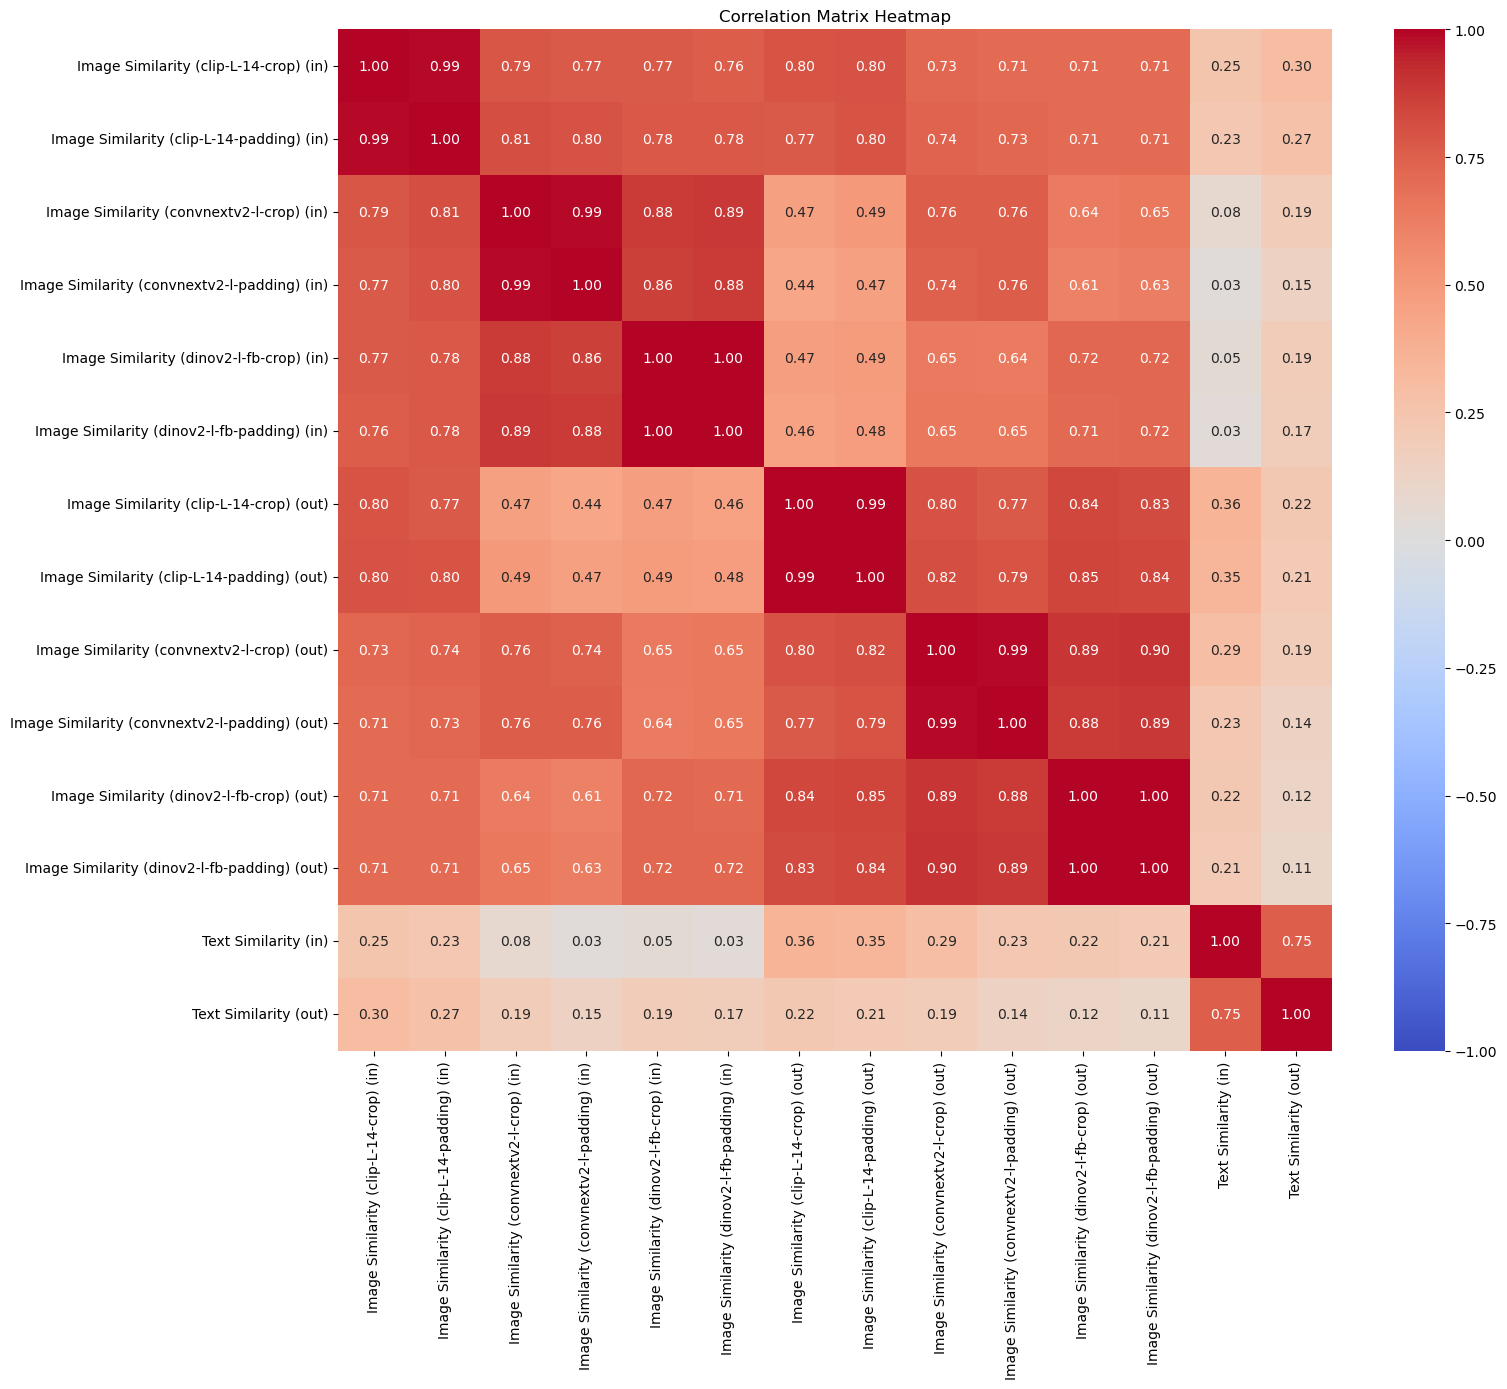

In [14]:
ordered_cols = [
    'Image Similarity (clip-L-14-crop) (in)',
    'Image Similarity (clip-L-14-padding) (in)',
    'Image Similarity (convnextv2-l-crop) (in)',
    'Image Similarity (convnextv2-l-padding) (in)',
    'Image Similarity (dinov2-l-fb-crop) (in)',
    'Image Similarity (dinov2-l-fb-padding) (in)',
    'Image Similarity (clip-L-14-crop) (out)',
    'Image Similarity (clip-L-14-padding) (out)',
    'Image Similarity (convnextv2-l-crop) (out)',
    'Image Similarity (convnextv2-l-padding) (out)',
    'Image Similarity (dinov2-l-fb-crop) (out)',
    'Image Similarity (dinov2-l-fb-padding) (out)',
    'Text Similarity (in)',
    'Text Similarity (out)',
]
correlation_matrix = me[ordered_cols].corr()

# Plot the heatmap with annotations
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
# plt.savefig("figures/metrics-correlation.png")

In [3]:
from contextlib import contextmanager

@contextmanager
def display_all_rows():
    prev_option = pd.get_option("display.max_rows")
    pd.set_option("display.max_rows", None)
    yield
    pd.set_option("display.max_rows", prev_option)

In [4]:
fd = pd.read_csv('fd.csv')
fd.head(5)

,Folder,FD (convnextv2-l),FD (clip-L-14),FD (convnextv2-l-padding),FD (clip-L-14-padding),FD (dinov2-l-fb-padding),FD (dinov2-l-fb),FD (dinov2-l-padding),FD (dinov2-l)
0,exp-1101-sd15-nt-b-000010,86.626260,90.031271,98.632530,97.037819,382.478771,374.087450,NaN,NaN
1,exp-1101-sd15-nt-c,108.595151,103.547485,116.293454,107.252071,429.434664,430.205135,NaN,NaN
2,exp-1102-sd15-nt-Prodigy-a-000010,103.615508,99.662046,110.950352,104.025621,387.921001,384.990484,NaN,NaN
3,exp-1102-sd15-nt-Prodigy-c,62.066245,74.475352,74.522222,80.445218,242.234324,236.826502,NaN,NaN
4,exp-1102-sd15-nt-Prodigy-a-000030,70.454398,80.194558,83.236383,85.833635,274.678115,271.174790,NaN,NaN


In [5]:
del fd['FD (dinov2-l-padding)']
del fd['FD (dinov2-l)']

In [6]:
cols_to_negate = fd.columns[fd.columns != 'Folder']
fd_neg = fd.copy()
fd_neg[cols_to_negate] = -fd[cols_to_negate]

In [7]:
me = pd.read_csv('metrics_mean.csv')
me.head(5)

,Folder,Text Similarity (in),Text Similarity (out),Image Similarity (clip-L-14) (in-crop),Image Similarity (clip-L-14) (out-crop),Image Similarity (clip-L-14) (in-padding),Image Similarity (clip-L-14) (out-padding),Image Similarity (convnextv2-l) (in-crop),Image Similarity (convnextv2-l) (out-crop),Image Similarity (convnextv2-l) (in-padding),...,Image Similarity (dinov2-l-fb) (in-crop),Image Similarity (dinov2-l-fb) (out-crop),Image Similarity (dinov2-l-fb) (in-padding),Image Similarity (dinov2-l-fb) (out-padding),vendi (clip-L-14) (in),vendi (clip-L-14) (out),vendi (dinov2-l-fb) (in),vendi (dinov2-l-fb) (out),vendi (convnextv2-l) (in),vendi (convnextv2-l) (out)
0,exp-1101-sd15-nt-a,0.228940,0.255014,0.663617,0.555443,0.659848,0.553219,0.594647,0.450725,0.591402,...,0.555154,0.365355,0.556242,0.367818,3.788351,1.970749,8.183229,2.913761,5.939924,2.372323
1,exp-1101-sd15-nt-a-000010,0.224737,0.263192,0.670238,0.540548,0.663898,0.536650,0.602470,0.430315,0.597129,...,0.563977,0.342777,0.563124,0.343319,3.856190,2.057199,8.231465,2.989695,5.914377,2.480411
2,exp-1101-sd15-nt-a-000010/anime,0.271176,0.295847,0.710565,0.644839,0.700682,0.634905,0.570065,0.451379,0.562342,...,0.556527,0.385845,0.550605,0.378674,3.049663,1.857656,8.186850,3.088818,6.352733,2.693207
3,exp-1101-sd15-nt-a-000010/anime/abukuma,0.277269,0.291101,0.739955,0.689199,0.727017,0.674412,0.603073,0.518925,0.592707,...,0.594323,0.449582,0.583851,0.436821,2.750627,1.702411,7.412668,2.756579,6.196102,2.311862
4,exp-1101-sd15-nt-a-000010/anime/ikamusume,0.251646,0.258702,0.736454,0.691947,0.727084,0.678051,0.597788,0.489504,0.590394,...,0.562708,0.434479,0.560396,0.429673,3.223268,1.908958,8.909789,3.176807,6.776548,2.955403


In [61]:
me.isna().any()

Folder                                           False
Text Similarity (in)                             False
Text Similarity (out)                            False
Image Similarity (clip-L-14) (in-crop)           False
Image Similarity (clip-L-14) (out-crop)          False
Image Similarity (clip-L-14) (in-padding)        False
Image Similarity (clip-L-14) (out-padding)       False
Image Similarity (convnextv2-l) (in-crop)        False
Image Similarity (convnextv2-l) (out-crop)       False
Image Similarity (convnextv2-l) (in-padding)     False
Image Similarity (convnextv2-l) (out-padding)    False
Image Similarity (dinov2-l-fb) (in-crop)         False
Image Similarity (dinov2-l-fb) (out-crop)        False
Image Similarity (dinov2-l-fb) (in-padding)      False
Image Similarity (dinov2-l-fb) (out-padding)     False
vendi (clip-L-14) (in)                           False
vendi (clip-L-14) (out)                          False
vendi (dinov2-l-fb) (in)                         False
vendi (din

In [15]:
keywords_to_exclude = ['Prodigy', '1054', '1057', 'scalar']

# Check if any of the keywords to exclude are in x
def exclude_keywords(x):
    return not any(keyword in x for keyword in keywords_to_exclude)

metrics_orig = pd.merge(fd_neg, me, on="Folder", how="left")
metrics = metrics_orig[metrics_orig["Folder"].apply(exclude_keywords)]
metrics.head(5)

,Folder,FD (convnextv2-l),FD (clip-L-14),FD (convnextv2-l-padding),FD (clip-L-14-padding),FD (dinov2-l-fb-padding),FD (dinov2-l-fb),Text Similarity (in),Text Similarity (out),Image Similarity (clip-L-14) (in-crop),...,Image Similarity (dinov2-l-fb) (in-crop),Image Similarity (dinov2-l-fb) (out-crop),Image Similarity (dinov2-l-fb) (in-padding),Image Similarity (dinov2-l-fb) (out-padding),vendi (clip-L-14) (in),vendi (clip-L-14) (out),vendi (dinov2-l-fb) (in),vendi (dinov2-l-fb) (out),vendi (convnextv2-l) (in),vendi (convnextv2-l) (out)
0,exp-1101-sd15-nt-b-000010,-86.626260,-90.031271,-98.632530,-97.037819,-382.478771,-374.087450,0.227468,0.265605,0.671040,...,0.567125,0.342995,0.567176,0.344404,3.738624,2.044056,7.928632,3.001075,6.001425,2.486153
1,exp-1101-sd15-nt-c,-108.595151,-103.547485,-116.293454,-107.252071,-429.434664,-430.205135,0.229468,0.255873,0.662160,...,0.555904,0.366469,0.556691,0.368890,3.776053,1.965598,7.985004,2.866835,5.960267,2.343950
7,exp-1101-sd15-nt-a,-106.632160,-102.028869,-112.794849,-106.110755,-426.980403,-427.759237,0.228940,0.255014,0.663617,...,0.555154,0.365355,0.556242,0.367818,3.788351,1.970749,8.183229,2.913761,5.939924,2.372323
8,exp-1101-sd15-nt-b-000030,-84.256217,-88.206435,-94.244325,-93.219795,-352.565132,-350.711676,0.230522,0.254901,0.669300,...,0.561629,0.383205,0.563346,0.386210,3.763562,1.949913,7.906214,2.803859,5.886101,2.288428
9,exp-1101-sd15-nt-a-000030,-84.854507,-88.507005,-92.861987,-93.476660,-348.217693,-347.391781,0.230592,0.257371,0.670451,...,0.562641,0.379379,0.564308,0.382062,3.698849,1.937078,7.934960,2.847661,5.934695,2.325348


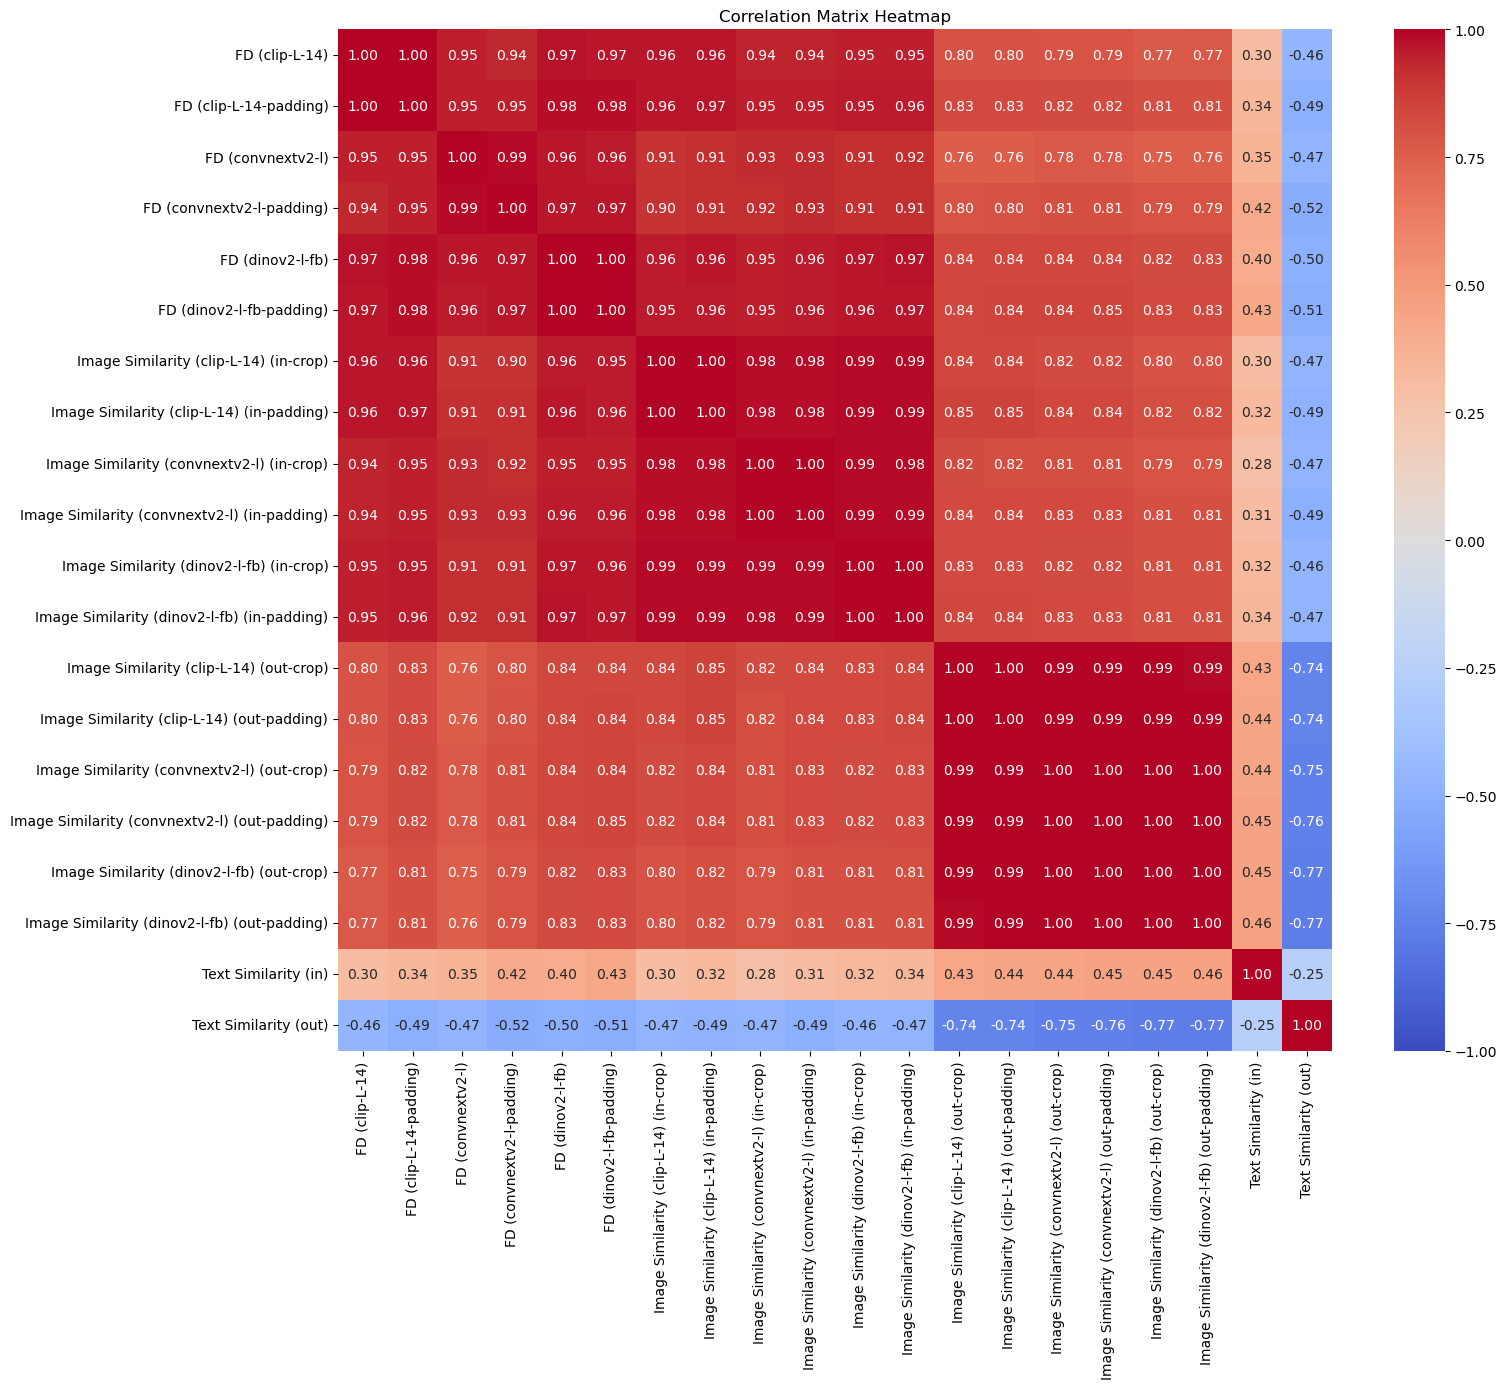

In [16]:
correlation_matrix = metrics.drop(columns="Folder").corr()
ordered_cols = [
    'FD (clip-L-14)',
    'FD (clip-L-14-padding)',
    'FD (convnextv2-l)',
    'FD (convnextv2-l-padding)',
    'FD (dinov2-l-fb)',
    'FD (dinov2-l-fb-padding)',
    'Image Similarity (clip-L-14) (in-crop)',
    'Image Similarity (clip-L-14) (in-padding)',
    'Image Similarity (convnextv2-l) (in-crop)',
    'Image Similarity (convnextv2-l) (in-padding)',
    'Image Similarity (dinov2-l-fb) (in-crop)',
    'Image Similarity (dinov2-l-fb) (in-padding)',
    'Image Similarity (clip-L-14) (out-crop)',
    'Image Similarity (clip-L-14) (out-padding)',
    'Image Similarity (convnextv2-l) (out-crop)',
    'Image Similarity (convnextv2-l) (out-padding)',
    'Image Similarity (dinov2-l-fb) (out-crop)',
    'Image Similarity (dinov2-l-fb) (out-padding)',
    'Text Similarity (in)',
    'Text Similarity (out)',
]
correlation_matrix = metrics[ordered_cols].corr()

# Plot the heatmap with annotations
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.savefig("figures/metrics-correlation.png")

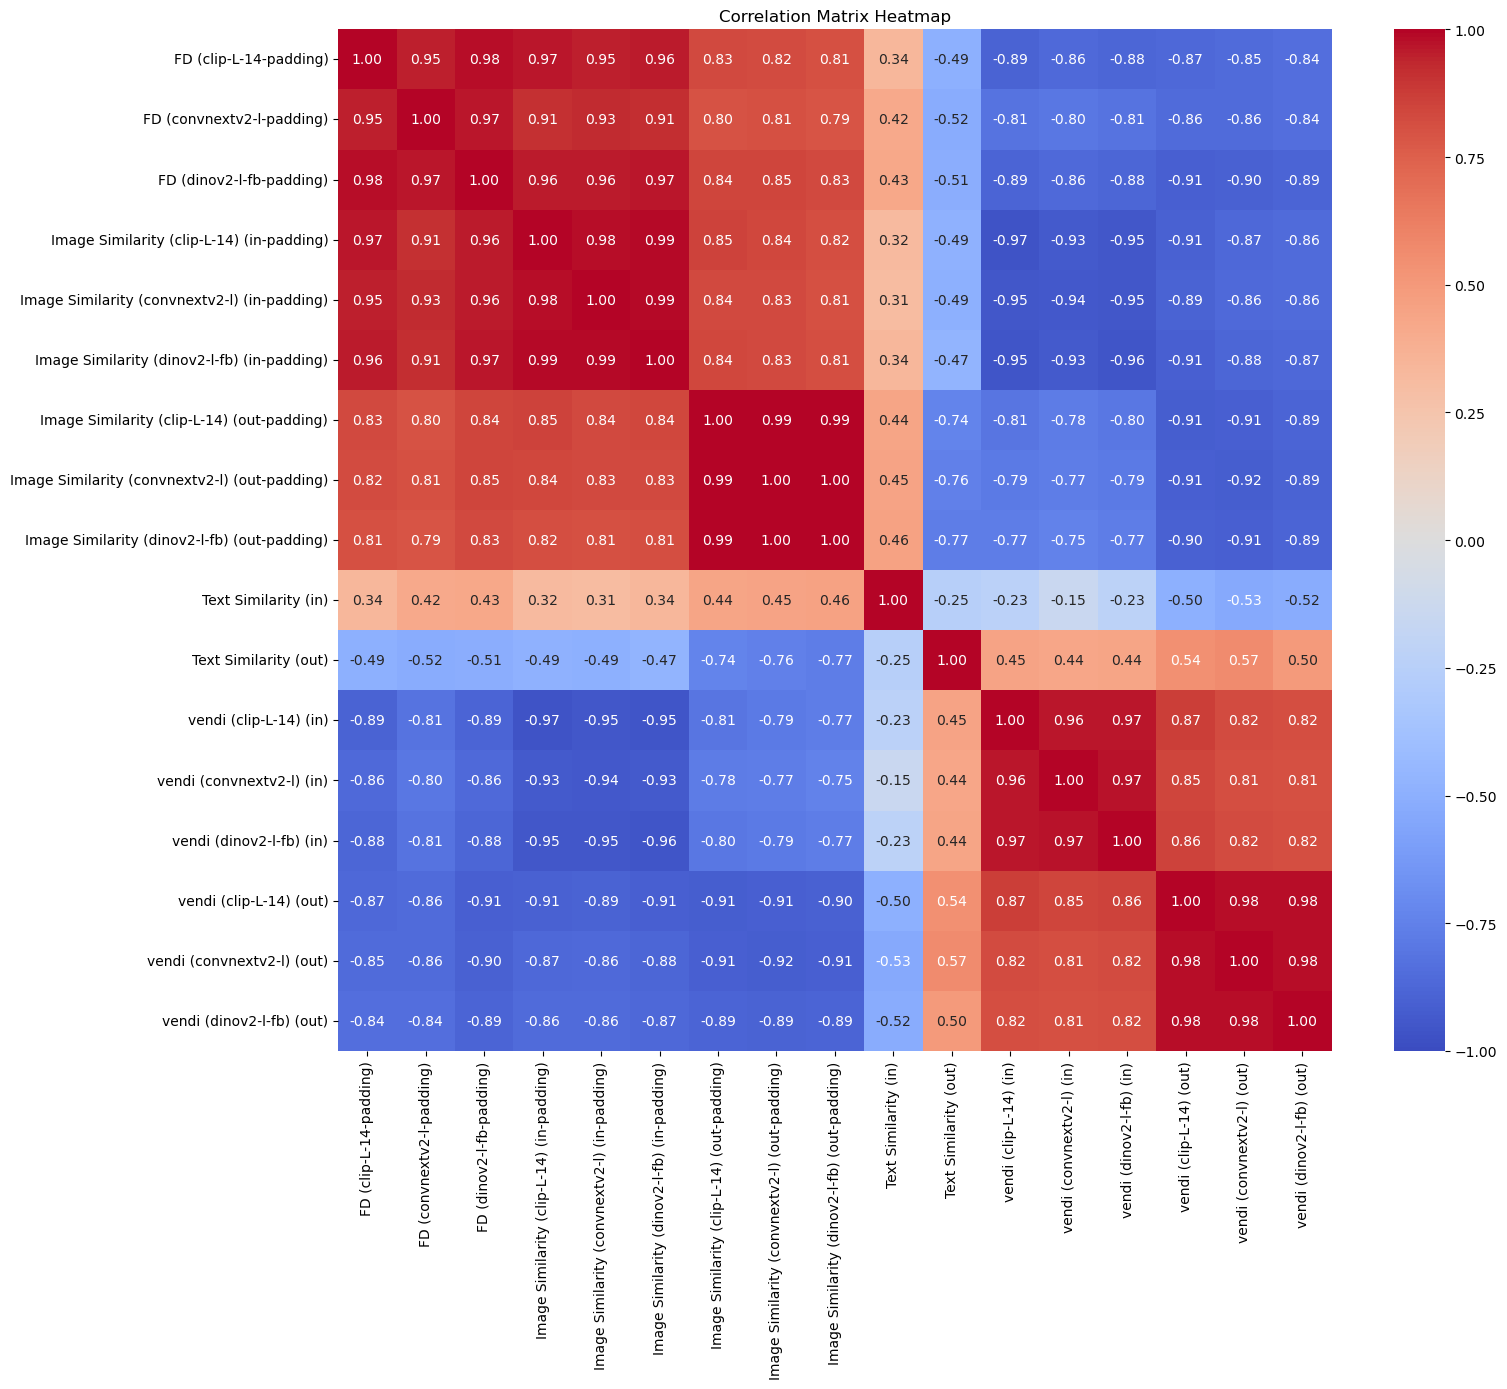

In [17]:
correlation_matrix = metrics.drop(columns="Folder").corr()
ordered_cols = [
    'FD (clip-L-14-padding)',
    'FD (convnextv2-l-padding)',
    'FD (dinov2-l-fb-padding)',
    'Image Similarity (clip-L-14) (in-padding)',
    'Image Similarity (convnextv2-l) (in-padding)',
    'Image Similarity (dinov2-l-fb) (in-padding)',
    'Image Similarity (clip-L-14) (out-padding)',
    'Image Similarity (convnextv2-l) (out-padding)',
    'Image Similarity (dinov2-l-fb) (out-padding)',
    'Text Similarity (in)',
    'Text Similarity (out)',
    'vendi (clip-L-14) (in)',
    'vendi (convnextv2-l) (in)',
    'vendi (dinov2-l-fb) (in)',
    'vendi (clip-L-14) (out)',
    'vendi (convnextv2-l) (out)',
    'vendi (dinov2-l-fb) (out)',
]
correlation_matrix = metrics[ordered_cols].corr()

# Plot the heatmap with annotations
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.savefig("figures/metrics-correlation-2.png")

In [89]:
with display_all_rows():
    display(fd.sort_values('FD (dinov2-l-fb-padding)'))

,Folder,FD (convnextv2-l),FD (clip-L-14),FD (convnextv2-l-padding),FD (clip-L-14-padding),FD (dinov2-l-fb-padding),FD (dinov2-l-fb)
12,exp-1102-sd15-nt-Prodigy-b,59.875754,73.280279,72.485568,79.076283,232.580223,228.834339
6,exp-1102-sd15-nt-Prodigy-a,57.843441,73.329231,70.899918,79.065559,233.085040,226.794297
3,exp-1102-sd15-nt-Prodigy-c,62.066245,74.475352,74.522222,80.445218,242.234324,236.826502
4,exp-1102-sd15-nt-Prodigy-a-000030,70.454398,80.194558,83.236383,85.833635,274.678115,271.174790
17,exp-1102-sd15-nt-Prodigy-c-000030,70.454398,80.194558,83.236383,85.833627,274.678115,271.174790
10,exp-1102-sd15-nt-Prodigy-b-000030,71.994528,81.086797,84.409465,86.295982,283.046339,279.255429
101,v15-exp-1012-sd15-loha16a8-a-000030,79.939875,85.158010,92.361128,90.924650,338.657974,329.693676
140,v15-exp-1012-sd15-loha16a8-c-000030,80.927202,83.572302,94.293374,90.217863,340.015839,330.758094
93,v15-exp-1013-sd15-loha16a1-a-000030,80.951290,84.785437,93.470102,90.836293,341.698887,333.352633
29,v15-exp-1006-sd15-lora8a4-scalar-b-000030,79.211649,83.452160,90.300590,89.830351,343.315524,334.636750


In [18]:
def plot_avg_metrics_curve(metrics_df, metrics_to_plot, x_columns=None):
    """
    Plot selected metrics using a line plot.
    
    :param metrics_df: DataFrame with metrics and 'Folder' column.
    :param metrics_to_plot: List of metric columns to plot.
    :param x_columns: List of column names to use for the x-axis.
    """
    plt.figure(figsize=(12, 8))

    if x_columns is None:
        x_columns = ['Folder']
    # Create a combined x-label using the values from the specified x_columns
    metrics_df['combined_x'] = metrics_df[x_columns].astype(str).agg(
        ' - '.join, axis=1)

    # Determine the column to sort by:
    if metrics_to_plot[0] in metrics_df.columns:
        sort_by_column = metrics_to_plot[0]
    elif f"{metrics_to_plot[0]}_mean" in metrics_df.columns:
        sort_by_column = f"{metrics_to_plot[0]}_mean"
    else:
        raise ValueError(
            f"Cannot determine sort column based on {metrics_to_plot[0]}")

    sorted_df = metrics_df.sort_values(by=sort_by_column)

    for metric in metrics_to_plot:
        # If metric directly exists
        if metric in sorted_df.columns:
            to_plot = sorted_df[metric]
            to_plot_normalized = (to_plot - np.min(to_plot)) / (
                np.max(to_plot) - np.min(to_plot))
            plt.plot(sorted_df['combined_x'], to_plot_normalized, label=metric)

        # If {metric}_mean and {metric}_std exist
        elif f"{metric}_mean" in sorted_df.columns and f"{metric}_stderr" in sorted_df.columns:
            mean_plot = sorted_df[f"{metric}_mean"]
            std_plot = sorted_df[f"{metric}_stderr"]

            mean_plot_normalized = (mean_plot - np.min(mean_plot)) / (
                np.max(mean_plot) - np.min(mean_plot))
            std_plot_normalized = std_plot / (
                np.max(mean_plot) - np.min(mean_plot)
            )  # Normalize std based on mean's range

            plt.plot(sorted_df['combined_x'],
                     mean_plot_normalized,
                     label=f"{metric}_mean")
            plt.fill_between(sorted_df['combined_x'],
                             mean_plot_normalized - std_plot_normalized,
                             mean_plot_normalized + std_plot_normalized,
                             alpha=0.2)
        else:
            raise ValueError(
                f"Column {metric} or {metric}_mean and {metric}_stderr not found in dataframe!"
            )

    plt.ylabel('Metric Value')
    plt.title('Selected Metrics Over Folders')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()

    # Cleanup: Drop the combined_x column from the dataframe to keep the original df intact
    metrics_df.drop(columns=['combined_x'], inplace=True)

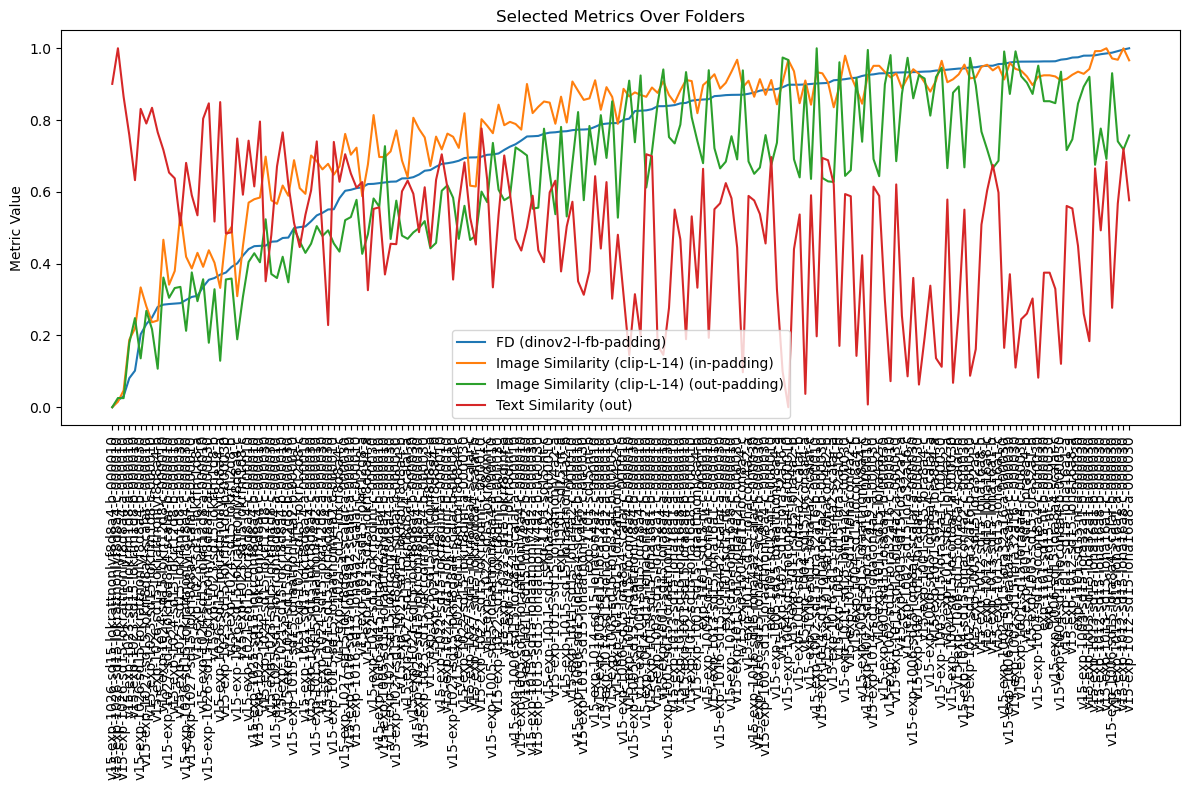

In [91]:
metrics_to_visualize = [
    'FD (dinov2-l-fb-padding)', 'Image Similarity (clip-L-14) (in-padding)',
    'Image Similarity (clip-L-14) (out-padding)', 'Text Similarity (out)'
]

plot_avg_metrics_curve(metrics, metrics_to_visualize)
plt.savefig("figures/sorted_values_plot.png")

In [10]:
config_mapping = pd.read_csv('../../config_mapping.csv')

In [13]:
with display_all_rows():
    display(config_mapping)

,config_name,algo,preset,lr,dim,alpha,factor
0,exp-1054-sd15-lokrf8dinf-lr5e-3-c,lokr,attn-mlp,0.005000,10000.0,1.0,8.0
1,exp-1055-sd15-lokrf4dinf-a,lokr,attn-mlp,0.000500,10000.0,1.0,4.0
2,exp-1055-sd15-lokrf4dinf-b,lokr,attn-mlp,0.000500,10000.0,1.0,4.0
3,exp-1055-sd15-lokrf4dinf-c,lokr,attn-mlp,0.000500,10000.0,1.0,4.0
4,exp-1056-sd15-lokrf4dinf-lr1e-3-a,lokr,attn-mlp,0.001000,10000.0,1.0,4.0
5,exp-1056-sd15-lokrf4dinf-lr1e-3-b,lokr,attn-mlp,0.001000,10000.0,1.0,4.0
6,exp-1056-sd15-lokrf4dinf-lr1e-3-c,lokr,attn-mlp,0.001000,10000.0,1.0,4.0
7,exp-1057-sd15-lokrf4dinf-lr5e-3-a,lokr,attn-mlp,0.005000,10000.0,1.0,4.0
8,exp-1057-sd15-lokrf4dinf-lr5e-3-b,lokr,attn-mlp,0.005000,10000.0,1.0,4.0
9,exp-1057-sd15-lokrf4dinf-lr5e-3-c,lokr,attn-mlp,0.005000,10000.0,1.0,4.0


In [20]:
%run utils.py

In [21]:
result_df = join_dataframes(config_mapping, metrics)
result_df

,Folder,FD (convnextv2-l),FD (clip-L-14),FD (convnextv2-l-padding),FD (clip-L-14-padding),FD (dinov2-l-fb-padding),FD (dinov2-l-fb),Text Similarity (in),Text Similarity (out),Image Similarity (clip-L-14) (in-crop),...,vendi (dinov2-l-fb) (out),vendi (convnextv2-l) (in),vendi (convnextv2-l) (out),step,algo,preset,lr,dim,alpha,factor
0,exp-1101-sd15-nt-b-000010,-86.626260,-90.031271,-98.632530,-97.037819,-382.478771,-374.087450,0.227468,0.265605,0.671040,...,3.001075,6.001425,2.486153,10,db,full,0.000001,NaN,NaN,NaN
1,exp-1101-sd15-nt-b-000030,-84.256217,-88.206435,-94.244325,-93.219795,-352.565132,-350.711676,0.230522,0.254901,0.669300,...,2.803859,5.886101,2.288428,30,db,full,0.000001,NaN,NaN,NaN
2,exp-1101-sd15-nt-b,-108.202329,-103.240809,-114.765248,-107.009699,-424.433925,-424.009175,0.229778,0.255041,0.662965,...,2.889958,5.971899,2.360799,50,db,full,0.000001,NaN,NaN,NaN
3,exp-1101-sd15-nt-c,-108.595151,-103.547485,-116.293454,-107.252071,-429.434664,-430.205135,0.229468,0.255873,0.662160,...,2.866835,5.960267,2.343950,50,db,full,0.000001,NaN,NaN,NaN
4,exp-1101-sd15-nt-c-000010,-90.465335,-90.348500,-103.927743,-97.875753,-393.057766,-376.429279,0.226406,0.264516,0.670005,...,2.904063,5.903147,2.423250,10,db,full,0.000001,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,v15-exp-1056-sd15-lokrf4dinf-lr1e-3-b-000030,-110.313532,-102.577765,-125.272234,-108.864442,-510.148292,-492.907407,0.217787,0.259271,0.646490,...,3.016142,6.049181,2.467842,30,lokr,attn-mlp,0.001000,10000.0,1.0,4.0
194,v15-exp-1056-sd15-lokrf4dinf-lr1e-3-b-000010,-115.554061,-97.261895,-126.135195,-103.763668,-507.242613,-495.406101,0.218442,0.257852,0.649058,...,3.139983,6.528829,2.545910,10,lokr,attn-mlp,0.001000,10000.0,1.0,4.0
195,v15-exp-1052-sd15-loha4a2-lr5e-3-b-000030,-97.847684,-90.309427,-109.122473,-96.127005,-409.488364,-395.677399,0.222601,0.261635,0.666007,...,3.094594,6.315038,2.498159,30,loha,attn-mlp,0.005000,4.0,2.0,NaN
196,v15-exp-1052-sd15-loha4a2-lr5e-3-b,-93.526996,-93.072107,-104.826237,-99.104593,-414.190011,-403.777105,0.221992,0.261528,0.663567,...,3.110231,6.091825,2.502404,50,loha,attn-mlp,0.005000,4.0,2.0,NaN


In [13]:
# Define the non-metric fields
non_metric_fields = [
    'step', 'algo', 'preset', 'lr', 'dim', 'alpha', 'factor', 'Folder'
]

# Derive metric fields (assuming they are float or int type)
metric_fields = [
    col for col in result_df.columns if col not in non_metric_fields
    and result_df[col].dtype in ['float64', 'int64']
]

# Group by 'preset' and 'lr' and compute mean and stderr for metric fields
aggregated_df = aggregate_metrics(result_df, ['preset', 'lr', 'step', 'algo'], metric_fields)
display(aggregated_df)

,preset,lr,step,algo,FD (convnextv2-l)_mean,FD (convnextv2-l)_stderr,FD (clip-L-14)_mean,FD (clip-L-14)_stderr,FD (convnextv2-l-padding)_mean,FD (convnextv2-l-padding)_stderr,...,vendi (clip-L-14) (out)_mean,vendi (clip-L-14) (out)_stderr,vendi (dinov2-l-fb) (in)_mean,vendi (dinov2-l-fb) (in)_stderr,vendi (dinov2-l-fb) (out)_mean,vendi (dinov2-l-fb) (out)_stderr,vendi (convnextv2-l) (in)_mean,vendi (convnextv2-l) (in)_stderr,vendi (convnextv2-l) (out)_mean,vendi (convnextv2-l) (out)_stderr
0,attn-mlp,0.000500,10,loha,-94.194190,1.961526,-92.537060,1.333261,-107.855218,2.005563,...,2.066834,0.016517,8.137935,0.111889,3.058903,0.032621,6.139384,0.080670,2.518310,0.026268
1,attn-mlp,0.000500,10,lokr,-115.263888,2.962835,-107.417542,2.448816,-129.046054,3.082467,...,2.230476,0.026516,9.596435,0.265755,3.326923,0.049018,6.836166,0.146424,2.717851,0.035958
2,attn-mlp,0.000500,10,lora,-94.550870,1.175751,-90.171333,0.779164,-104.955882,1.236919,...,2.044583,0.007820,8.156887,0.069731,3.041528,0.015838,6.185029,0.051895,2.467272,0.019729
3,attn-mlp,0.000500,30,loha,-85.090467,1.240418,-86.146127,0.682106,-97.991124,1.275650,...,2.014765,0.009872,7.829439,0.069363,2.969375,0.021148,5.838400,0.045538,2.407811,0.016332
4,attn-mlp,0.000500,30,lokr,-102.787039,1.616080,-98.704785,1.266250,-117.923819,1.873804,...,2.191807,0.017950,8.779258,0.164254,3.301759,0.034047,6.347603,0.089580,2.683370,0.027444
5,attn-mlp,0.000500,30,lora,-84.378375,0.783383,-86.365452,0.425248,-95.164321,0.756325,...,1.979994,0.009566,8.043285,0.054665,2.900742,0.013384,5.978524,0.052469,2.335537,0.011410
6,attn-mlp,0.000500,50,loha,-85.099062,0.794077,-87.064327,0.328082,-98.102878,0.846952,...,2.038479,0.009344,7.952314,0.062554,3.003960,0.019103,5.934455,0.043168,2.445929,0.015771
7,attn-mlp,0.000500,50,lokr,-103.882351,2.068604,-98.430052,1.423989,-118.535025,2.150118,...,2.206782,0.019198,9.030353,0.156699,3.309255,0.037644,6.517731,0.086763,2.696694,0.028788
8,attn-mlp,0.000500,50,lora,-86.151795,0.604383,-88.279283,0.511656,-96.917014,0.735511,...,1.996428,0.006643,8.108171,0.042815,2.941046,0.012284,6.067593,0.037110,2.368580,0.010818
9,attn-mlp,0.001000,10,loha,-94.406281,1.466074,-91.987157,0.810420,-108.008462,0.952302,...,2.060189,0.007904,8.150457,0.025475,3.061519,0.017794,6.132854,0.017265,2.514309,0.013927


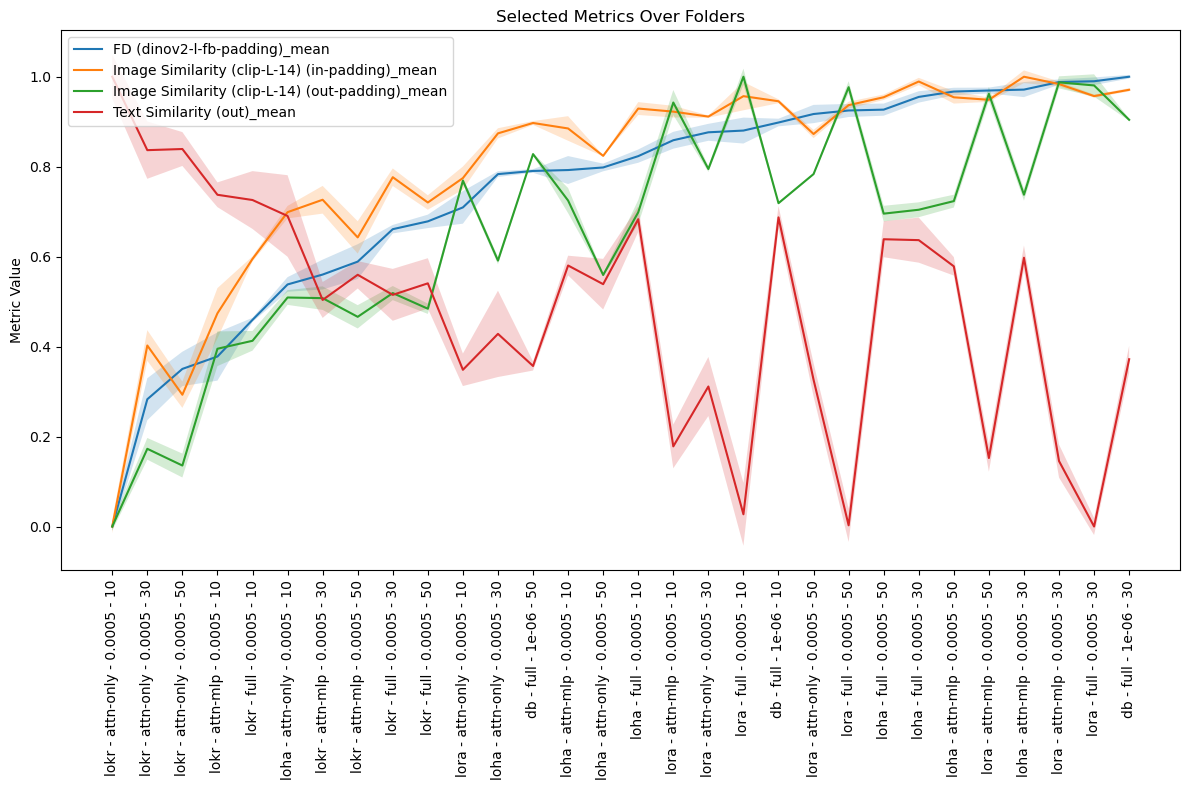

In [100]:
metrics_to_visualize = [
    'FD (dinov2-l-fb-padding)', 'Image Similarity (clip-L-14) (in-padding)',
    'Image Similarity (clip-L-14) (out-padding)', 'Text Similarity (out)'
]
plot_avg_metrics_curve(aggregated_df, metrics_to_visualize,
                       ['algo', 'preset', 'lr', 'step'])

plt.savefig("figures/sorted_values_plot_1.png")

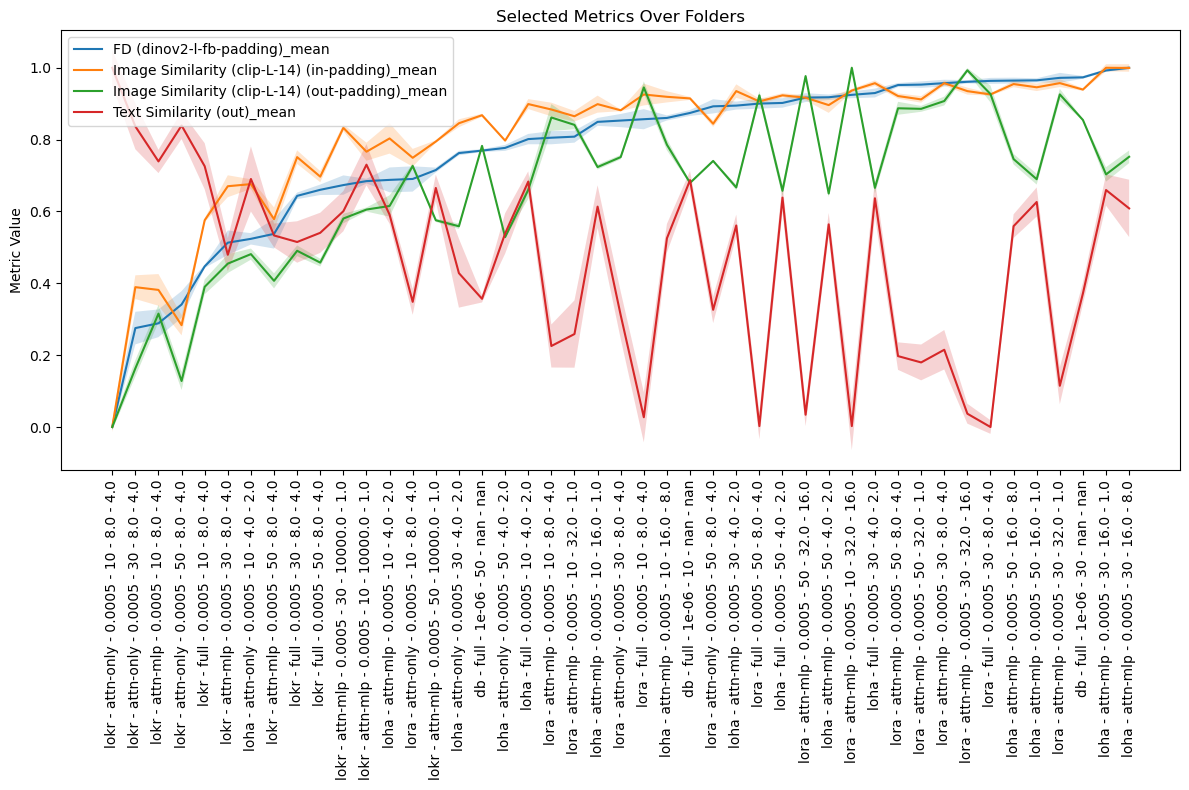

In [101]:
agg_fields = ['algo', 'preset', 'lr', 'step', 'dim', 'alpha']

aggregated_df = aggregate_metrics(result_df, agg_fields, metric_fields)

metrics_to_visualize = [
    'FD (dinov2-l-fb-padding)', 'Image Similarity (clip-L-14) (in-padding)',
    'Image Similarity (clip-L-14) (out-padding)', 'Text Similarity (out)'
]
plot_avg_metrics_curve(aggregated_df, metrics_to_visualize, agg_fields)

plt.savefig("figures/sorted_values_plot_2.png")

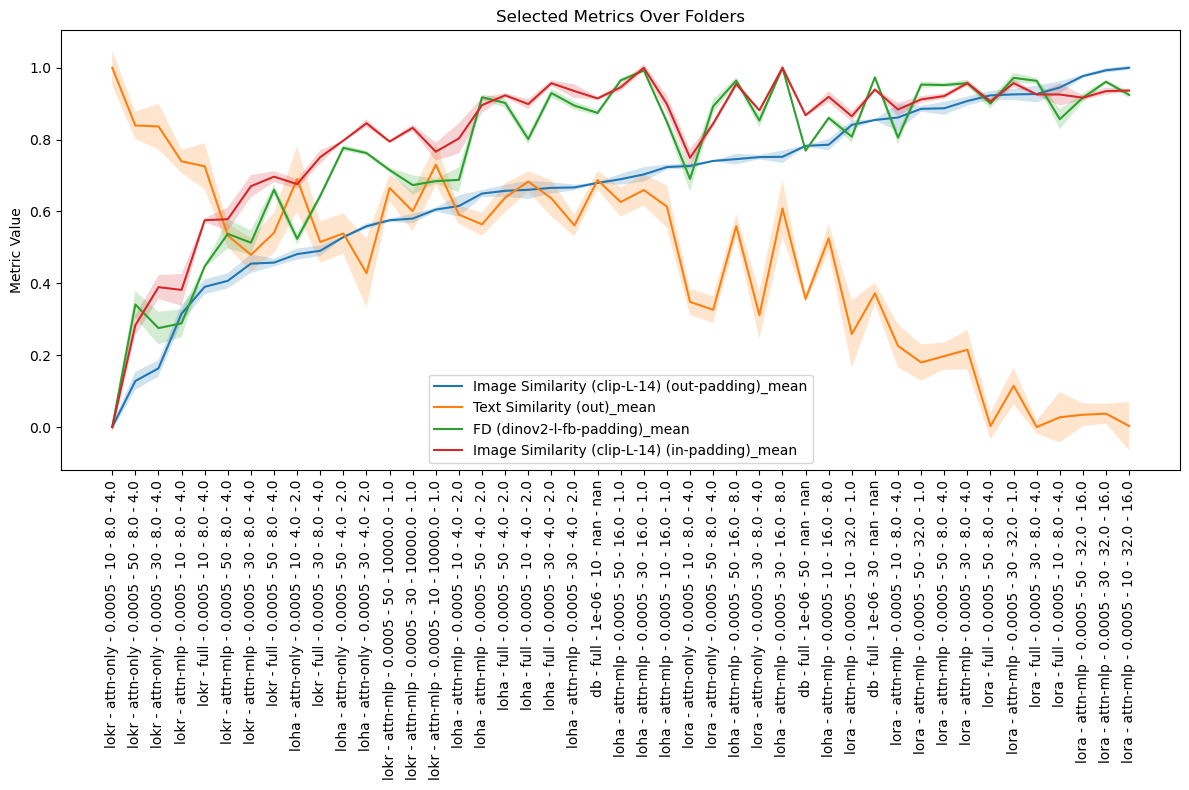

In [102]:
agg_fields = ['algo', 'preset', 'lr', 'step', 'dim', 'alpha']

aggregated_df = aggregate_metrics(result_df, agg_fields, metric_fields)

metrics_to_visualize = [
    'Image Similarity (clip-L-14) (out-padding)',
    'Text Similarity (out)',
    'FD (dinov2-l-fb-padding)',
    'Image Similarity (clip-L-14) (in-padding)',
]
plot_avg_metrics_curve(aggregated_df, metrics_to_visualize, agg_fields)

plt.savefig("figures/sorted_values_plot_3.png")

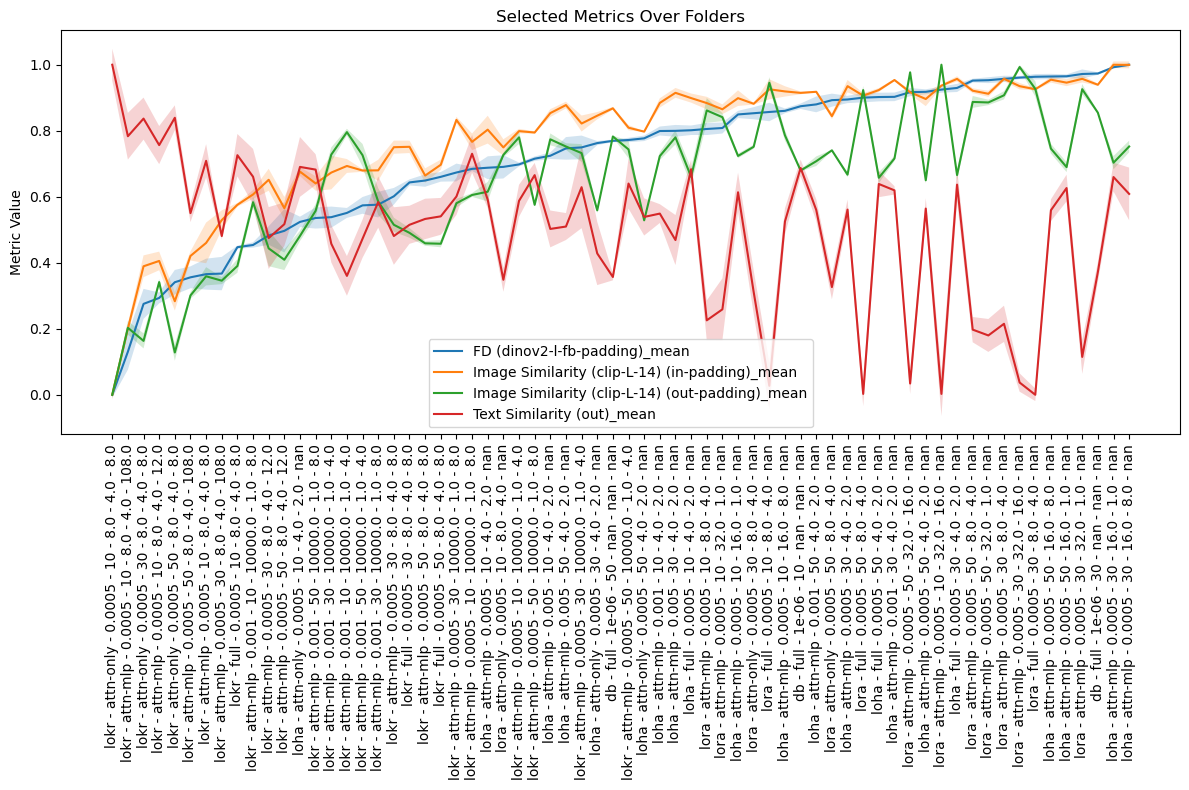

In [17]:
agg_fields = ['algo', 'preset', 'lr', 'step', 'dim', 'alpha', 'factor']

aggregated_df = aggregate_metrics(result_df, agg_fields, metric_fields)

metrics_to_visualize = [
    'FD (dinov2-l-fb-padding)', 'Image Similarity (clip-L-14) (in-padding)',
    'Image Similarity (clip-L-14) (out-padding)', 'Text Similarity (out)'
]
plot_avg_metrics_curve(aggregated_df, metrics_to_visualize, agg_fields)

plt.savefig("figures/sorted_values_plot_fd.png")

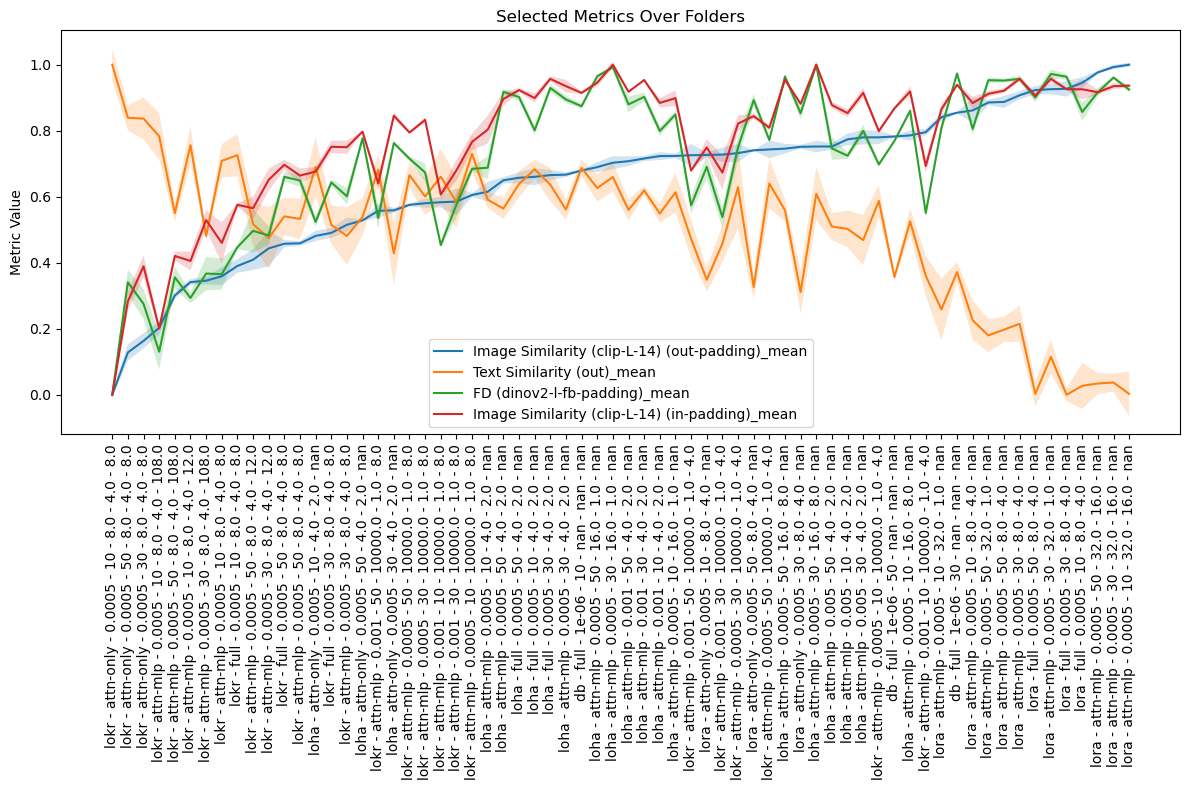

In [18]:
agg_fields = ['algo', 'preset', 'lr', 'step', 'dim', 'alpha', 'factor']

aggregated_df = aggregate_metrics(result_df, agg_fields, metric_fields)

metrics_to_visualize = [
    'Image Similarity (clip-L-14) (out-padding)',
    'Text Similarity (out)',
    'FD (dinov2-l-fb-padding)',
    'Image Similarity (clip-L-14) (in-padding)',
]
plot_avg_metrics_curve(aggregated_df, metrics_to_visualize, agg_fields)

plt.savefig("figures/sorted_values_plot_ims.png")

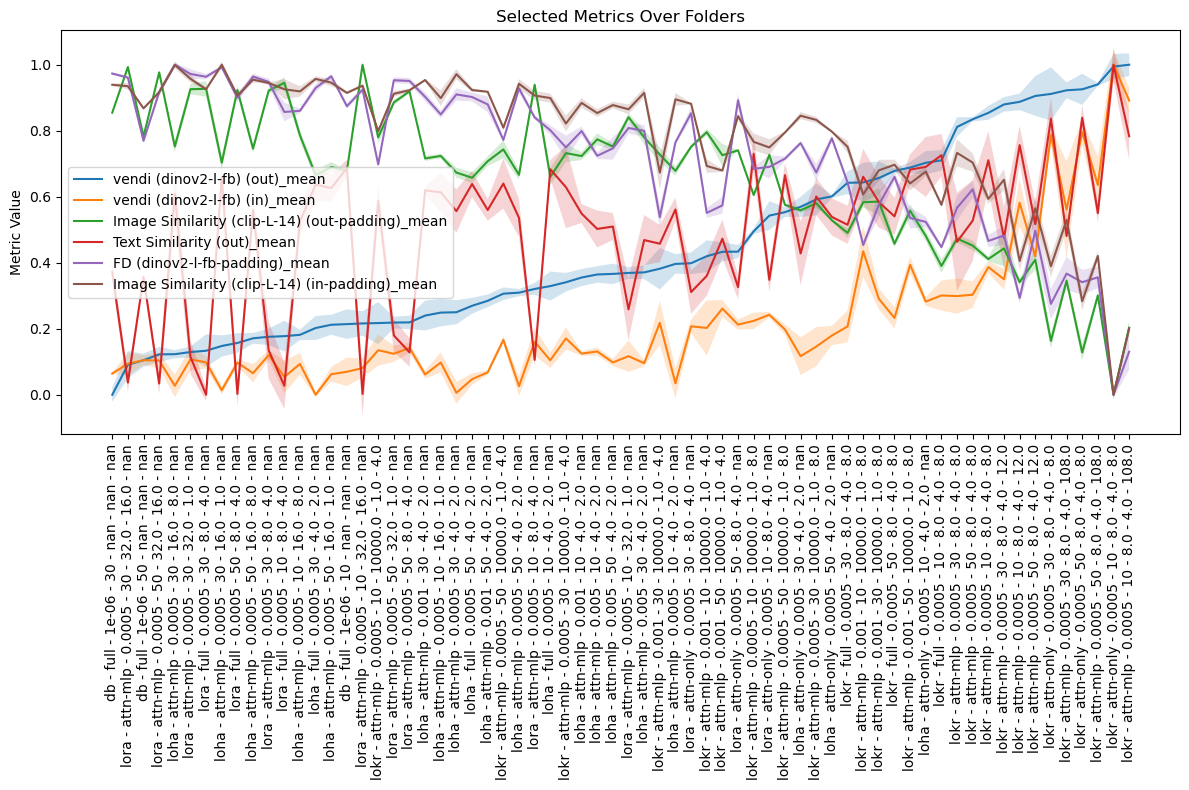

In [22]:
agg_fields = ['algo', 'preset', 'lr', 'step', 'dim', 'alpha', 'factor']

aggregated_df = aggregate_metrics(result_df, agg_fields, metric_fields)

metrics_to_visualize = [
    'vendi (dinov2-l-fb) (out)',
    'vendi (dinov2-l-fb) (in)',
    'Image Similarity (clip-L-14) (out-padding)',
    'Text Similarity (out)',
    'FD (dinov2-l-fb-padding)',
    'Image Similarity (clip-L-14) (in-padding)',
]
plot_avg_metrics_curve(aggregated_df, metrics_to_visualize, agg_fields)

plt.savefig("figures/sorted_values_plot_vendi.png")

In [28]:
def find_systematic_worse(dataframe, metrics, X):
    """
    Find rows in dataframe where all metrics rank in the last X%.

    Parameters:
    - dataframe (pd.DataFrame): Input dataframe.
    - metrics (list): List of columns considered as metrics.
    - X (float): The percentage threshold. e.g., if X = 10, then we are looking for rows where all metrics are in the bottom 10%.

    Returns:
    - pd.DataFrame: Subset of dataframe where all metrics rank in the last X%.
    """

    threshold = X / 100

    # Filter dataframe where all metrics are below their respective thresholds.
    mask = dataframe[metrics].apply(
        lambda col: col <= col.quantile(threshold)).all(axis=1)

    return dataframe[mask]

In [43]:
%run utils.py

In [42]:
worse

,Folder,FD (convnextv2-l),FD (clip-L-14),FD (convnextv2-l-padding),FD (clip-L-14-padding),FD (dinov2-l-fb-padding),FD (dinov2-l-fb),Text Similarity (in),Text Similarity (out),Image Similarity (clip-L-14) (in-crop),...,Image Similarity (clip-L-14) (out-padding),Image Similarity (convnextv2-l) (in-crop),Image Similarity (convnextv2-l) (out-crop),Image Similarity (convnextv2-l) (in-padding),Image Similarity (convnextv2-l) (out-padding),Image Similarity (dinov2-l-fb) (in-crop),Image Similarity (dinov2-l-fb) (out-crop),Image Similarity (dinov2-l-fb) (in-padding),Image Similarity (dinov2-l-fb) (out-padding),CommonPrefix
223,v15-exp-1054-sd15-lokrf8dinf-lr5e-3-a,-158.508908,-135.854774,-173.564329,-142.981936,-749.768901,-731.924294,0.213147,0.240024,0.566924,...,0.486028,0.499808,0.381299,0.493029,0.378527,0.440856,0.305455,0.439690,0.305237,v15-exp-1054-sd15-lokrf8dinf-lr5e-3
226,v15-exp-1054-sd15-lokrf8dinf-lr5e-3-b-000010,-175.737756,-139.080824,-196.416363,-145.654874,-798.367903,-772.260628,0.203403,0.233482,0.574269,...,0.489824,0.489888,0.377306,0.476807,0.369588,0.440062,0.307387,0.436090,0.305122,v15-exp-1054-sd15-lokrf8dinf-lr5e-3-000010
249,v15-exp-1054-sd15-lokrf8dinf-lr5e-3-a-000030,-161.186480,-152.891692,-173.159081,-158.765548,-769.870485,-762.770830,0.209043,0.237509,0.545597,...,0.462434,0.491387,0.356988,0.485862,0.356233,0.422485,0.282781,0.423497,0.283844,v15-exp-1054-sd15-lokrf8dinf-lr5e-3-000030
251,v15-exp-1054-sd15-lokrf8dinf-lr5e-3-c-000010,-169.862444,-151.049365,-188.862083,-158.082282,-859.676690,-838.026888,0.193793,0.224583,0.549771,...,0.473276,0.493487,0.383558,0.484270,0.379221,0.417690,0.294246,0.414658,0.294108,v15-exp-1054-sd15-lokrf8dinf-lr5e-3-000010
255,v15-exp-1054-sd15-lokrf8dinf-lr5e-3-b,-166.106881,-139.264161,-178.485649,-145.896426,-795.623654,-783.221881,0.212351,0.243567,0.570477,...,0.481518,0.496414,0.373211,0.486359,0.368190,0.436487,0.290867,0.433804,0.289821,v15-exp-1054-sd15-lokrf8dinf-lr5e-3
265,v15-exp-1054-sd15-lokrf8dinf-lr5e-3-a-000010,-143.400554,-134.426517,-156.452085,-141.889674,-723.391881,-705.040271,0.215370,0.246396,0.585532,...,0.502366,0.525123,0.409381,0.517186,0.405340,0.464596,0.324831,0.462082,0.324027,v15-exp-1054-sd15-lokrf8dinf-lr5e-3-000010
266,v15-exp-1057-sd15-lokrf4dinf-lr5e-3-b,-153.692194,-137.331471,-160.250655,-142.670301,-738.860117,-729.511627,0.217155,0.244041,0.572698,...,0.497985,0.498077,0.395028,0.494620,0.394652,0.440774,0.315561,0.440298,0.316315,v15-exp-1057-sd15-lokrf4dinf-lr5e-3
267,v15-exp-1054-sd15-lokrf8dinf-lr5e-3-b-000030,-153.210166,-139.841366,-169.100396,-147.164269,-744.303945,-727.233441,0.209849,0.239069,0.573989,...,0.496043,0.513391,0.397775,0.504134,0.393105,0.447843,0.312246,0.445147,0.311084,v15-exp-1054-sd15-lokrf8dinf-lr5e-3-000030
269,v15-exp-1054-sd15-lokrf8dinf-lr5e-3-c,-170.015428,-137.414925,-184.801109,-143.957244,-754.617335,-739.291392,0.205788,0.236799,0.564430,...,0.487236,0.497547,0.384767,0.490959,0.382008,0.429947,0.302856,0.427658,0.302284,v15-exp-1054-sd15-lokrf8dinf-lr5e-3
274,v15-exp-1057-sd15-lokrf4dinf-lr5e-3-c-000030,-177.324981,-148.643706,-193.840484,-156.421108,-851.136734,-829.251759,0.207374,0.235336,0.549192,...,0.473816,0.474850,0.363864,0.467269,0.359502,0.396589,0.284786,0.393536,0.283498,v15-exp-1057-sd15-lokrf4dinf-lr5e-3-000030


In [50]:
metric_fields = [
    'Text Similarity (in)',
    'Text Similarity (out)',
    'FD (dinov2-l-fb-padding)',
    'Image Similarity (clip-L-14) (in-padding)',
    'Image Similarity (clip-L-14) (out-padding)',
]

worse = find_systematic_worse(metrics_orig, metric_fields, 50)
group_and_aggregate(worse).sort_values('count')[['CommonPrefix', 'count']]

,CommonPrefix,count
0,v15-exp-1017-sd15-loha4a2-Prodigy-000010,1
10,v15-exp-1053-sd15-lokrf8dinf-lr1e-3-000030,1
7,v15-exp-1025-sd15-lokrconf8d8a4-000030,1
6,v15-exp-1025-sd15-lokrconf8d8a4,1
8,v15-exp-1027-sd15-lokrf8d8a4-scalar,1
2,v15-exp-1021-sd15-lokrf8d8a4-000030,1
1,v15-exp-1021-sd15-lokrf8d8a4,1
16,v15-exp-1057-sd15-lokrf4dinf-lr5e-3-000030,1
5,v15-exp-1024-sd15-lokrf12d8-000030,2
9,v15-exp-1027-sd15-lokrf8d8a4-scalar-000030,2
